K9.data file is the new data (2012), dimension = 30k * 5k; K8.data file is the old data (2010), dimension = 16k * 5k. Download it at: https://archive.ics.uci.edu/ml/datasets/p53+Mutants.

Both data are imbalanced.
K9: 30000:151
K8: 16000:143

## Data Preprocessing

#### Data Cleaning
In this part, we dropped observations having missing values, and we extracted the response variable and the explanatory variables.

In [167]:
import pandas as pd
import numpy as np
p53 =  pd.read_csv('K8.data', sep=",", header = None, low_memory=False)

In [168]:
p53.shape

(16772, 5410)

In [169]:
p53.head(10)

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN
5,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive,NaN
6,-0.150,0.016,-0.014,0.000,0.016,-0.123,-0.004,-0.002,-0.005,0.010,...,-0.033,-0.032,0.029,-0.052,-0.029,-0.006,0.004,0.023,inactive,NaN
7,-0.158,0.002,-0.019,-0.028,-0.008,-0.101,0.011,0.005,0.001,0.003,...,-0.025,-0.003,0.017,-0.017,-0.009,-0.001,0.017,0.012,inactive,NaN
8,-0.152,0.009,-0.015,-0.008,0.004,-0.120,-0.002,-0.002,-0.007,0.004,...,-0.009,-0.007,0.009,-0.027,-0.012,-0.009,0.008,0.021,inactive,NaN
9,-0.172,-0.028,0.003,-0.045,-0.055,-0.078,0.039,0.011,0.006,-0.020,...,0.031,-0.059,0.05,0.01,-0.005,0.137,0.098,-0.015,inactive,NaN


In [170]:
tmp = p53.iloc[:, 5408]
tmp

0        inactive
1        inactive
2        inactive
3        inactive
4        inactive
           ...   
16767      active
16768      active
16769    inactive
16770    inactive
16771      active
Name: 5408, Length: 16772, dtype: object

In [173]:
(tmp == "inactive").sum()

16629

In [174]:
(tmp == "active").sum()

143

In [175]:
# extract the response variable
# y_df = p53[5408]
# print(y_df)

In [176]:
np.isnan(p53[5409]).sum()

16772

Since this column is all NaN, drop it and extract the explanatory variables.

In [177]:
p53 = p53.iloc[:, 0:5409]
p53

,0,1,2,3,4,5,6,7,8,9,...,5399,5400,5401,5402,5403,5404,5405,5406,5407,5408
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.006,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,inactive
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.019,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.051,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16767,-0.175,-0.036,0.005,-0.050,-0.065,-0.041,0.047,0.012,0.003,-0.019,...,0.021,0.028,0.037,0.027,0.039,-0.013,0.013,0.011,-0.026,active
16768,-0.158,-0.000,-0.015,-0.021,-0.004,-0.106,0.010,0.006,0.001,0.002,...,-0.004,-0.007,0,0.012,-0.016,-0.012,-0.005,0.011,0.01,active
16769,-0.174,-0.024,0.026,-0.044,-0.061,-0.097,0.049,0.007,0.001,-0.033,...,0.01,0.051,0.043,0.03,0.057,-0.009,0.019,0.005,-0.026,inactive
16770,-0.184,-0.072,-0.018,-0.091,-0.110,0.020,0.098,0.036,0.028,-0.023,...,0.066,0.027,0.07,0.048,0.078,-0.014,0.022,0.028,-0.067,inactive


In [178]:
np.array(p53 == "?").sum()

901854

Then we drop rows containing "?" (missing value):

In [179]:
p53 = p53.replace('?', np.nan)

In [180]:
p53 = p53.dropna()

In [181]:
p53.shape

(16592, 5409)

we only dropped 180 observations.

In [187]:
16772 - 16592

180

Finally, we seperate the explanatory variables and the response variable, and transfer $X$ to a numerical dataframe

In [188]:
X_df = p53.iloc[:, 0:5408]
y_df = p53.iloc[:, 5408]

In [194]:
(y_df == "inactive").sum()

16449

In [195]:
(y_df == "active").sum()

143

In [196]:
X_df = X_df.astype(float)

In [202]:
y_df[y_df == "active"] = 1
y_df[y_df == "inactive"] = 0

In [207]:
y_df = y_df.astype(float)

#### Split training set (80%) and testing set (20%)

In this part, we randomly split 80:20 training and testing sets. We standardized the training set to have mean $0$ and std $1$, and we also scaled the testing set using the mean and std information of the training set for later use in assessing the predictive performance of the models.

We first split the training and testing datasets.

In [244]:
X = X_df.to_numpy(dtype = np.float32)
y = y_df.to_numpy(dtype = np.int32)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [246]:
y_test.sum() / 143

0.20279720279720279

In [247]:
import matplotlib.pyplot as plt

We first draw histograms to visualize the range of all the explanatory variables.

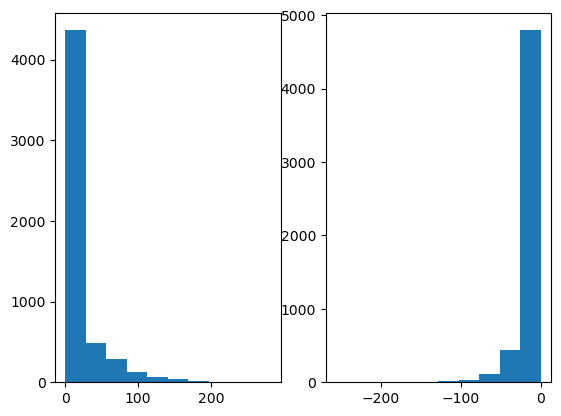

In [248]:
plt.subplot(1, 2, 1)
plt.hist(X_df.max())

plt.subplot(1, 2, 2)
plt.hist(X_df.min())

plt.show()

The ranges of different variables vary a lot, so we need to standardize it.

In [249]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
X_train.mean(axis = 0)

array([ 6.2959174e-08, -2.2817368e-08,  2.2792538e-08, ...,
        5.2127682e-08, -7.0263248e-08, -1.2096065e-07], dtype=float32)

In [253]:
X_train.std(axis = 0)

array([1.0000067 , 0.99999744, 0.99999225, ..., 0.99998826, 1.0000185 ,
       0.99999964], dtype=float32)

In [258]:
# X_test.mean(axis = 0)

In [259]:
# X_test.std(axis = 1)

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [275]:
y_pred = clf.predict(X_test)

In [278]:
np.mean(y_pred == y_test)

0.991262428442302

In [281]:
np.mean(y_test == 0)

0.991262428442302